### **Objective:**
####  
Perform exploratory Data Analysis and determine Training Labels.

    create a column for the class
    Standardize the data
    Split into training data and test data

Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

    Find the method performs best using test data



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

import requests
import io

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

### Load the Data

In [3]:
# Load the dataframe

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

response = requests.get(URL1)
if response.status_code == 200:
    SpaceX_data = pd.read_csv(io.StringIO(response.text))
else:
    print(f"HTTP GET request failed with status code: {response.status_code}")

In [4]:
SpaceX_data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
response = requests.get(URL2)
if response.status_code == 200:
    Data = pd.read_csv(io.StringIO(response.text))
else:
    print(f"HTTP GET request failed with status code: {response.status_code}")

## Preprocessing Data

In [6]:
Data.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [7]:
noms_de_colonnes = Data.columns.tolist()
noms_de_colonnes

['FlightNumber',
 'PayloadMass',
 'Flights',
 'Block',
 'ReusedCount',
 'Orbit_ES-L1',
 'Orbit_GEO',
 'Orbit_GTO',
 'Orbit_HEO',
 'Orbit_ISS',
 'Orbit_LEO',
 'Orbit_MEO',
 'Orbit_PO',
 'Orbit_SO',
 'Orbit_SSO',
 'Orbit_VLEO',
 'LaunchSite_CCAFS SLC 40',
 'LaunchSite_KSC LC 39A',
 'LaunchSite_VAFB SLC 4E',
 'LandingPad_5e9e3032383ecb267a34e7c7',
 'LandingPad_5e9e3032383ecb554034e7c9',
 'LandingPad_5e9e3032383ecb6bb234e7ca',
 'LandingPad_5e9e3032383ecb761634e7cb',
 'LandingPad_5e9e3033383ecbb9e534e7cc',
 'Serial_B0003',
 'Serial_B0005',
 'Serial_B0007',
 'Serial_B1003',
 'Serial_B1004',
 'Serial_B1005',
 'Serial_B1006',
 'Serial_B1007',
 'Serial_B1008',
 'Serial_B1010',
 'Serial_B1011',
 'Serial_B1012',
 'Serial_B1013',
 'Serial_B1015',
 'Serial_B1016',
 'Serial_B1017',
 'Serial_B1018',
 'Serial_B1019',
 'Serial_B1020',
 'Serial_B1021',
 'Serial_B1022',
 'Serial_B1023',
 'Serial_B1025',
 'Serial_B1026',
 'Serial_B1028',
 'Serial_B1029',
 'Serial_B1030',
 'Serial_B1031',
 'Serial_B1032',


In [8]:
Y = SpaceX_data['Class'].to_numpy()
Y = pd.Series(Y)

In [9]:
transform = preprocessing.StandardScaler()
X_data = transform.fit_transform(Data)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y, test_size=0.2, random_state=1)

In [11]:
Y_test.shape

(18,)

## Régression Logistique

In [12]:
parameters ={'C':[0.01,0.1,1], 'penalty':['l2'], 'solver':['lbfgs']}
logreg = LogisticRegression()

logreg_cv = GridSearchCV(logreg, parameters, cv=15)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [13]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8633333333333334


In [14]:
accuracy_lr = logreg_cv.score(X_test, Y_test)
print(f"Accuracy on the test data: {accuracy_lr}")

Accuracy on the test data: 0.8888888888888888


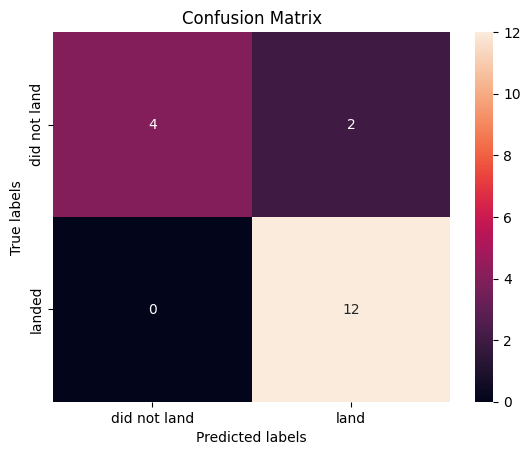

In [15]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## Support Vector Machine

In [16]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [17]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.8625


In [18]:
accuracy_svm = svm_cv.score(X_test, Y_test)
print(f"Accuracy on the test data: {accuracy_svm}")

Accuracy on the test data: 0.8888888888888888


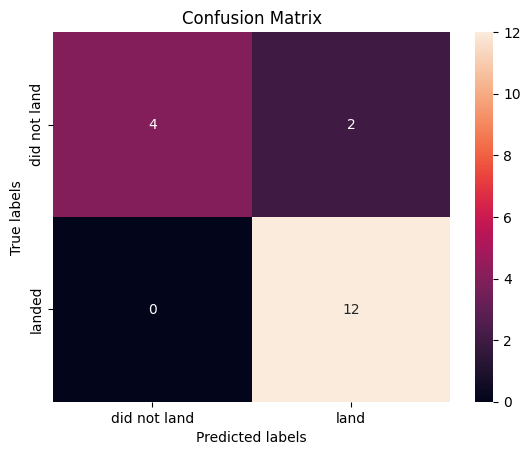

In [19]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## Decision Tree Classifier

In [20]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=15)
tree_cv.fit(X_train, Y_train)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [21]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy_tree :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy_tree : 0.8900000000000001


In [22]:
accuracy_tree = tree_cv.score(X_test, Y_test)
print(f"Accuracy_tree on the test data: {accuracy_tree}")

Accuracy_tree on the test data: 0.8888888888888888


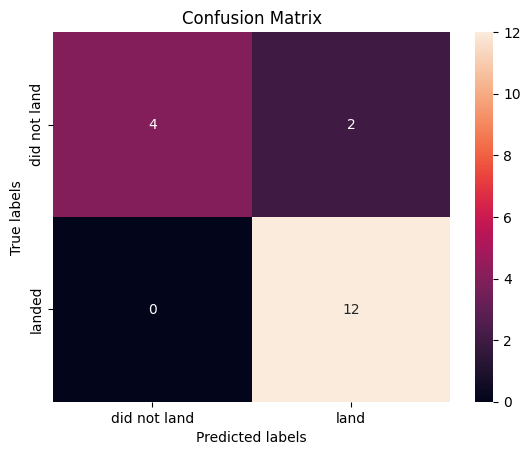

In [23]:
yhat=tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [39]:
import joblib
joblib.dump(tree_cv, "loan_tree.joblib")

['loan_tree.joblib']

## k Nearest Neighbors

In [24]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
KNN_cv = GridSearchCV(KNN, parameters, cv=10)
KNN_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [25]:
print("tuned hpyerparameters :(best parameters) ",KNN_cv.best_params_)
print("accuracy :",KNN_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}
accuracy : 0.8892857142857142


In [26]:
accuracy_KNN = KNN_cv.score(X_test, Y_test)
print(f"Accuracy_tree on the test data: {accuracy_KNN}")

Accuracy_tree on the test data: 0.7777777777777778


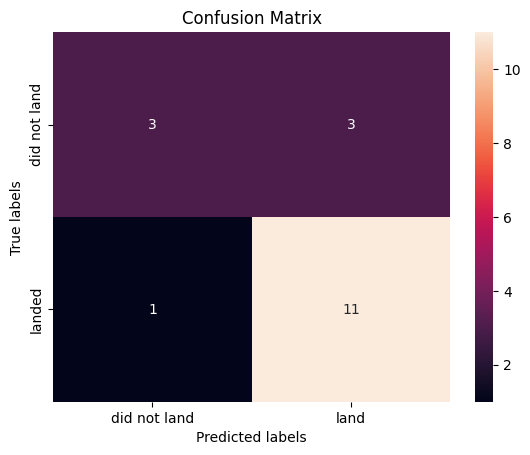

In [27]:
yhat = KNN_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## Réseau de neurone

In [28]:
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

In [29]:
# Construire le modèle DNN

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Définir un rappel pour arrêter l'entraînement prématurément si la performance ne s'améliore pas
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [30]:
# Entraîner le modèle
history = model.fit(X_train, Y_train, epochs=100, batch_size=1, validation_split=0.3)

Epoch 1/100
50/50 [==============================] - 2s 12ms/step - loss: 0.6547 - accuracy: 0.7000 - val_loss: 0.6014 - val_accuracy: 0.5909
Epoch 2/100
50/50 [==============================] - 0s 6ms/step - loss: 0.4109 - accuracy: 0.7800 - val_loss: 0.5886 - val_accuracy: 0.8636
Epoch 3/100
50/50 [==============================] - 0s 5ms/step - loss: 0.1321 - accuracy: 0.9800 - val_loss: 0.6269 - val_accuracy: 0.7273
Epoch 4/100
50/50 [==============================] - 0s 6ms/step - loss: 0.0511 - accuracy: 0.9800 - val_loss: 0.7727 - val_accuracy: 0.8636
Epoch 5/100
50/50 [==============================] - 0s 6ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 0.7624 - val_accuracy: 0.7727
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.8306 - val_accuracy: 0.7727
Epoch 7/100
50/50 [==============================] - 0s 6ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.9349 - val_accuracy: 0.7727
Epoch 8/100


In [31]:
# Évaluer la performance sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
train_loss, train_accuracy = model.evaluate(X_train, Y_train)
print(f"Test Accuracy: {test_accuracy}")
print(f"Train Accuracy: {train_accuracy}")

3/3 [==============================] - 0s 6ms/step - loss: 0.4993 - accuracy: 0.9306
Test Accuracy: 0.8333333134651184
Train Accuracy: 0.9305555820465088


In [32]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 83.33%


In [33]:

def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

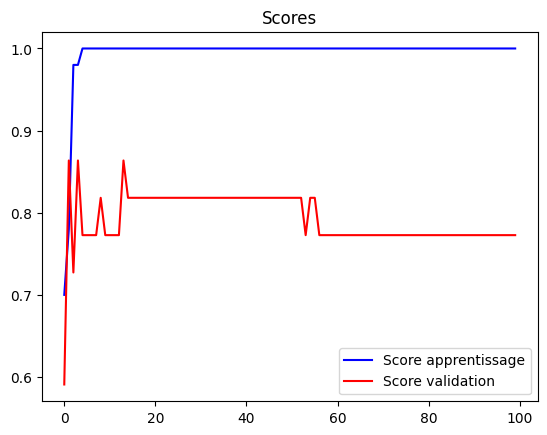

In [34]:
plot_scores(history)

In [35]:
# Vous pouvez utiliser le modèle entraîné pour faire des prédictions sur de nouvelles données
yhat = model.predict(X_test)
yhat

1/1 [==============================] - 0s 173ms/step


array([[1.0000000e+00],
       [9.9999851e-01],
       [9.9978864e-01],
       [9.9989390e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [7.1170786e-07],
       [9.9220526e-01],
       [9.0443069e-01],
       [9.9999923e-01],
       [6.2496429e-03],
       [9.9999803e-01],
       [9.9999803e-01],
       [8.8335821e-07],
       [9.8467106e-01],
       [1.0000000e+00],
       [9.7549790e-09],
       [1.0943244e-06]], dtype=float32)

In [36]:
train = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=200, verbose=1)

Epoch 1/50
1/1 [==============================] - 1s 965ms/step - loss: 0.4015 - accuracy: 0.9583 - val_loss: 1.4817 - val_accuracy: 0.8333
Epoch 2/50
1/1 [==============================] - 0s 38ms/step - loss: 0.4084 - accuracy: 0.9444 - val_loss: 1.2788 - val_accuracy: 0.8333
Epoch 3/50
1/1 [==============================] - 0s 41ms/step - loss: 0.1662 - accuracy: 0.9861 - val_loss: 1.0906 - val_accuracy: 0.8333
Epoch 4/50
1/1 [==============================] - 0s 38ms/step - loss: 0.1175 - accuracy: 0.9861 - val_loss: 0.9426 - val_accuracy: 0.8889
Epoch 5/50
1/1 [==============================] - 0s 40ms/step - loss: 0.0646 - accuracy: 0.9861 - val_loss: 0.9313 - val_accuracy: 0.7778
Epoch 6/50
1/1 [==============================] - 0s 52ms/step - loss: 0.0294 - accuracy: 0.9861 - val_loss: 0.9266 - val_accuracy: 0.8333
Epoch 7/50
1/1 [==============================] - 0s 59ms/step - loss: 0.0359 - accuracy: 1.0000 - val_loss: 0.8118 - val_accuracy: 0.8333
Epoch 8/50
1/1 [==========

In [37]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))


Score : 77.78%
